<a href="https://colab.research.google.com/github/gr8nishan/Fast-Ai-Course/blob/master/Lesson%201-%20Fine%20Grained%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [0]:
from PIL import Image

In [0]:
path = untar_data(URLs.PETS);path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
frames = get_image_files(path_img)
frames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_96.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_165.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_setter_39.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_183.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_84.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img,frames,pat,ds_tfms=get_transforms(),size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Abyssinian,keeshond,english_setter,Siamese,wheaten_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
basset_hound,Ragdoll,miniature_pinscher,staffordshire_bull_terrier,British_Shorthair
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

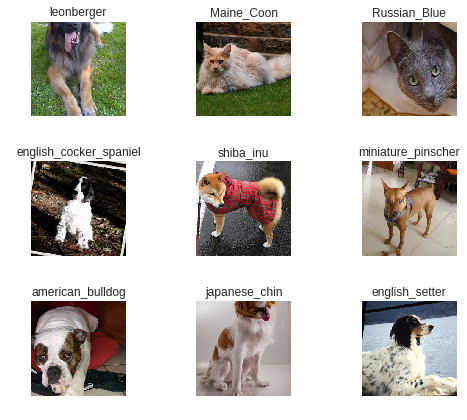

In [0]:
data.show_batch(rows=3,figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.367127,0.347732,0.096076
2,0.551701,0.251094,0.080514
3,0.341198,0.226801,0.075778
4,0.238847,0.214661,0.067659


In [0]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr = slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate
1,0.226262,0.211025,0.064953
2,0.206842,0.206314,0.066306
